# Amplification by Shuffling

In [1]:
import longitudinal
import test

# Above are the modules constructed for this project
# longitudinal contains the client and server, as well as some methods for vector manipulation specific to this domain
# test contains an instance which encapsulates the entire environment, including running and stats, and some test suites

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Transform a matrix into a matrix-wide min/max normalized version
def normalize_matrix(Y):
    ymin = np.min(Y)
    ymax = np.max(Y)
    return np.array([test.rescale(Y[i], ymin, ymax) for i in range(rep)])

In [3]:
# Make an instance to test with
rep = 20
n = 1024*128
d = 32
k = 4
eps = 0.4
instance = test.Instance(n, d, k, eps)
x = np.arange(0, d, dtype=int)

In [4]:
# Do an "honest" run (epsilon = 100)
old = instance.epsilon
instance.epsilson = 100
Y_honest = np.array([instance.run(True, False) for i in range(rep)])
instance.epsilson = old
Y_norm_honest = normalize_matrix(Y_honest)

In [5]:
# Do a "noiseless" run (report "0" rather than noise)
old = instance.hide_zero = False
Y_noiseless = np.array([instance.run(True, False) for i in range(rep)])
instance.hide_zero = old
Y_norm_noiseless = normalize_matrix(Y_noiseless)

In [6]:
# Do a "leaf" run (report from leaf always rather than higher in the tree)
old = instance.choose_level = False
Y_leaf = np.array([instance.run(True, False) for i in range(rep)])
instance.choose_level = old
Y_norm_leaf = normalize_matrix(Y_leaf)

In [7]:
# Make a matrix with all the results in it (actual run)
Y = np.array([instance.run(True, False) for i in range(rep)])
Y_norm = normalize_matrix(Y)

In [13]:
# Multipurpose plotting method
def do_instance_plot(title, x, plots, xlabel, ylabel):
    plt.figure(dpi=250)
    for plot in plots:
        Y = plot[0]
        label = plot[1]
        if len(Y.shape) == 1:
            plt.plot(x, Y, label=label)
        else:
            plt.errorbar(x, np.mean(Y, axis=0), yerr=(np.std(Y, axis=0)), label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(0, len(x) + 1, int(len(x) / 8)))
    plt.title(title)
    plt.legend()
    plt.show()

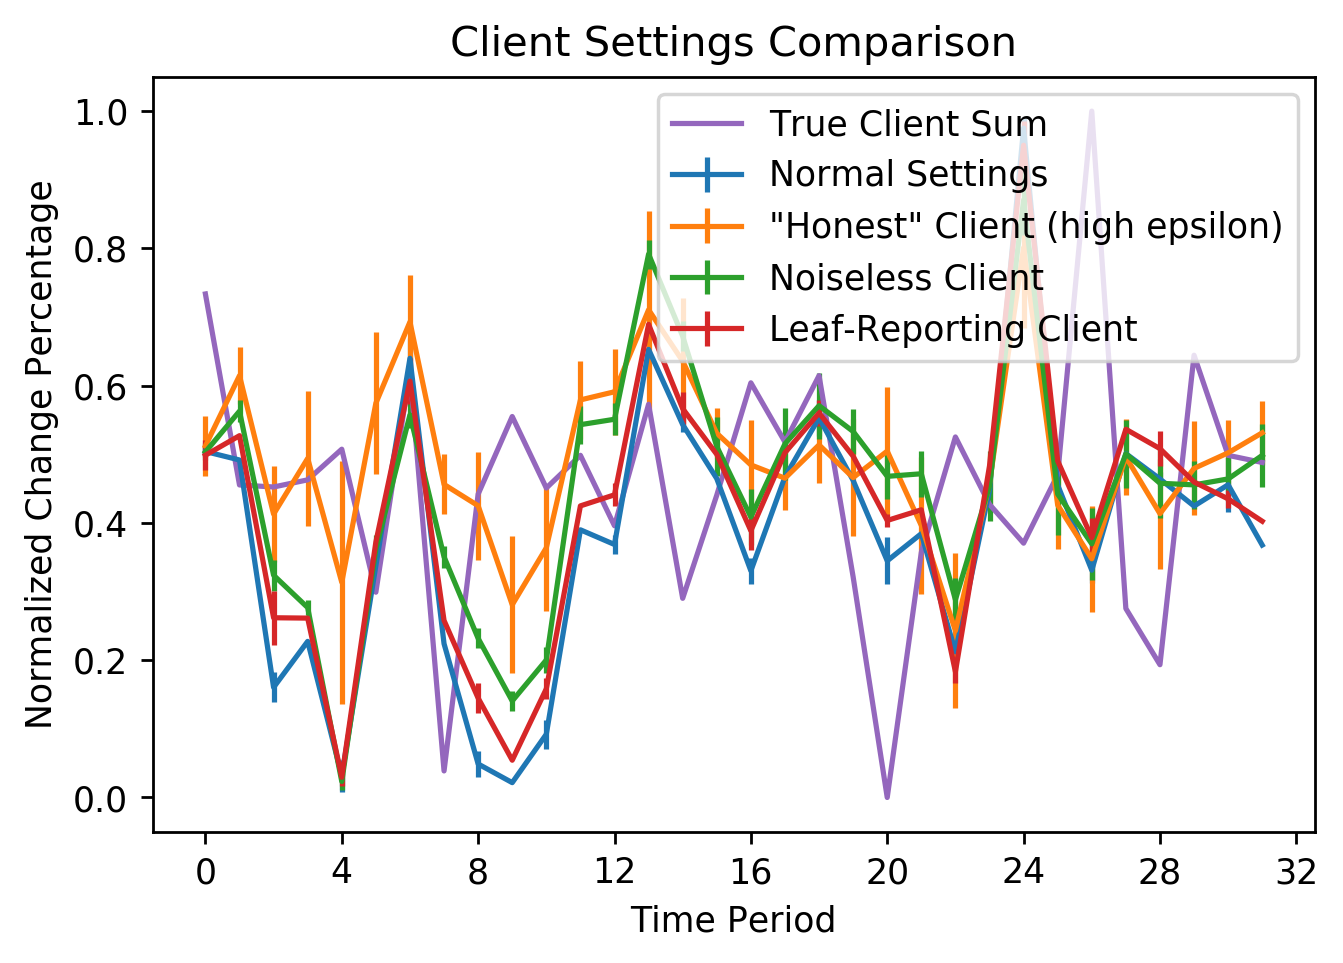

In [14]:
# Plot comparisons of server with and without settings
plots = []
plots.append([Y_norm, 'Normal Settings'])
plots.append([Y_norm_honest, '"Honest" Client (high epsilon)'])
plots.append([Y_norm_noiseless, 'Noiseless Client'])
plots.append([Y_norm_leaf, 'Leaf-Reporting Client'])
plots.append([test.rescale(instance.f_true, np.min(instance.f_true), np.max(instance.f_true)), 'True Client Sum'])
do_instance_plot('Client Settings Comparison', x, plots, 'Time Period', 'Normalized Change Percentage')